In [1]:
import numpy as np
import matplotlib
import pylab as plt

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [3]:
X, y = make_classification(n_samples=1000, n_features=30, n_informative=30,
                           n_redundant=0,
                           n_classes=5)
# y = y[:,np.newaxis]
y = OneHotEncoder(sparse=False, categories='auto').fit_transform(y.reshape((-1,1)))
X = StandardScaler().fit_transform(X)
# y = y.T
# X = X.T

In [4]:
X.shape, y.shape

((1000, 30), (1000, 5))

In [5]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(30,)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-2),
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 155       
Total params: 1,085
Trainable params: 1,085
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X, y, batch_size=256, epochs=40, verbose=0)

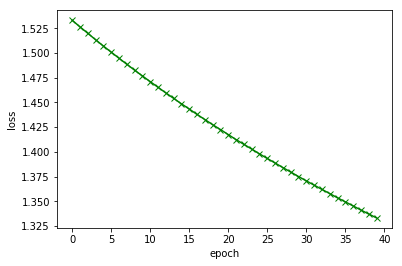

In [17]:
plt.plot(history.history['loss'], 'gx-')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [18]:
yt = y.argmax(axis=1)
ypp = model.predict(X)
yp = ypp.argmax(axis=1)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.51      0.56      0.54       202
           1       0.51      0.62      0.56       203
           2       0.43      0.39      0.41       201
           3       0.42      0.35      0.38       199
           4       0.40      0.37      0.38       195

    accuracy                           0.46      1000
   macro avg       0.45      0.46      0.45      1000
weighted avg       0.45      0.46      0.45      1000

